# Predict the Percentage of the Marks using Linear Regression

## Objective:

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import the Data
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
df.shape

(25, 2)

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Marks Scored')

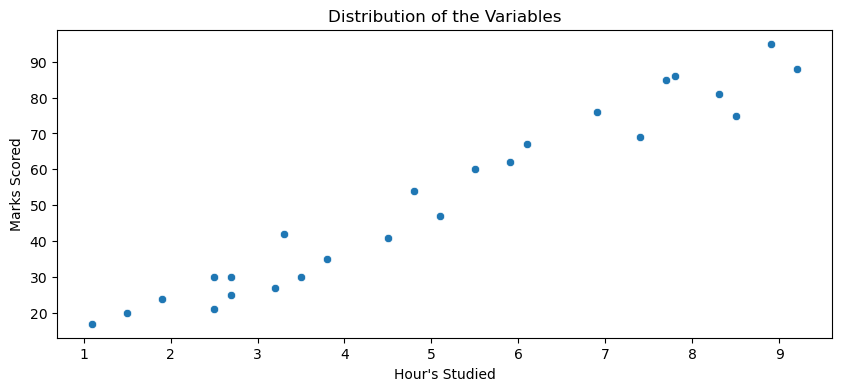

In [10]:
# To view the distribution using scatter plot
plt.figure(figsize=(10,4))
sns.scatterplot(x=df.Hours,y=df.Scores)
plt.title("Distribution of the Variables")
plt.xlabel("Hour's Studied")
plt.ylabel("Marks Scored")

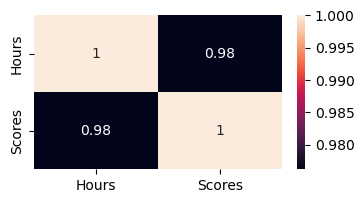

In [17]:
# Correlation plot
plt.figure(figsize=(4,2))
correlation_matrix = df.corr()
sns.heatmap(data = correlation_matrix,annot = True)
plt.show()

In [22]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [26]:
# Splitting the X,y into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [31]:
# Importing Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
# Fitting the model
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)

print("Training complete.")

Training complete.


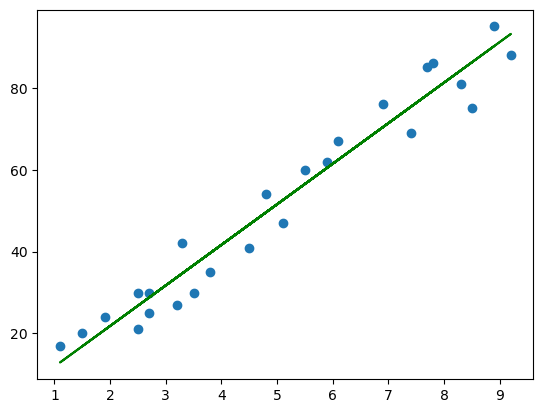

In [35]:
# Plotting the regression line
fit_line = model.coef_*X+model.intercept_

# Plotting the data
plt.scatter(X,y)
plt.plot(X,fit_line,color = 'g')
plt.show()

In [36]:
# Predicting the dataset
y_pred = model.predict(X_test)

In [37]:
# Actual Predicted Data
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [38]:
# Model Evaluation
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_pred))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

MAE: 4.183859899002975
RMSE: 4.6474476121003665
R-Square: 0.9454906892105356


In [39]:
# Testing with your own data
hours = np.array([9.25]) # No. of hours should be mentioned inside array
hours = hours.reshape(-1,1)
own_pred = model.predict(hours)
print("No of Hours = {}".format(float(hours)))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = 9.25
Predicted Score = 93.69
